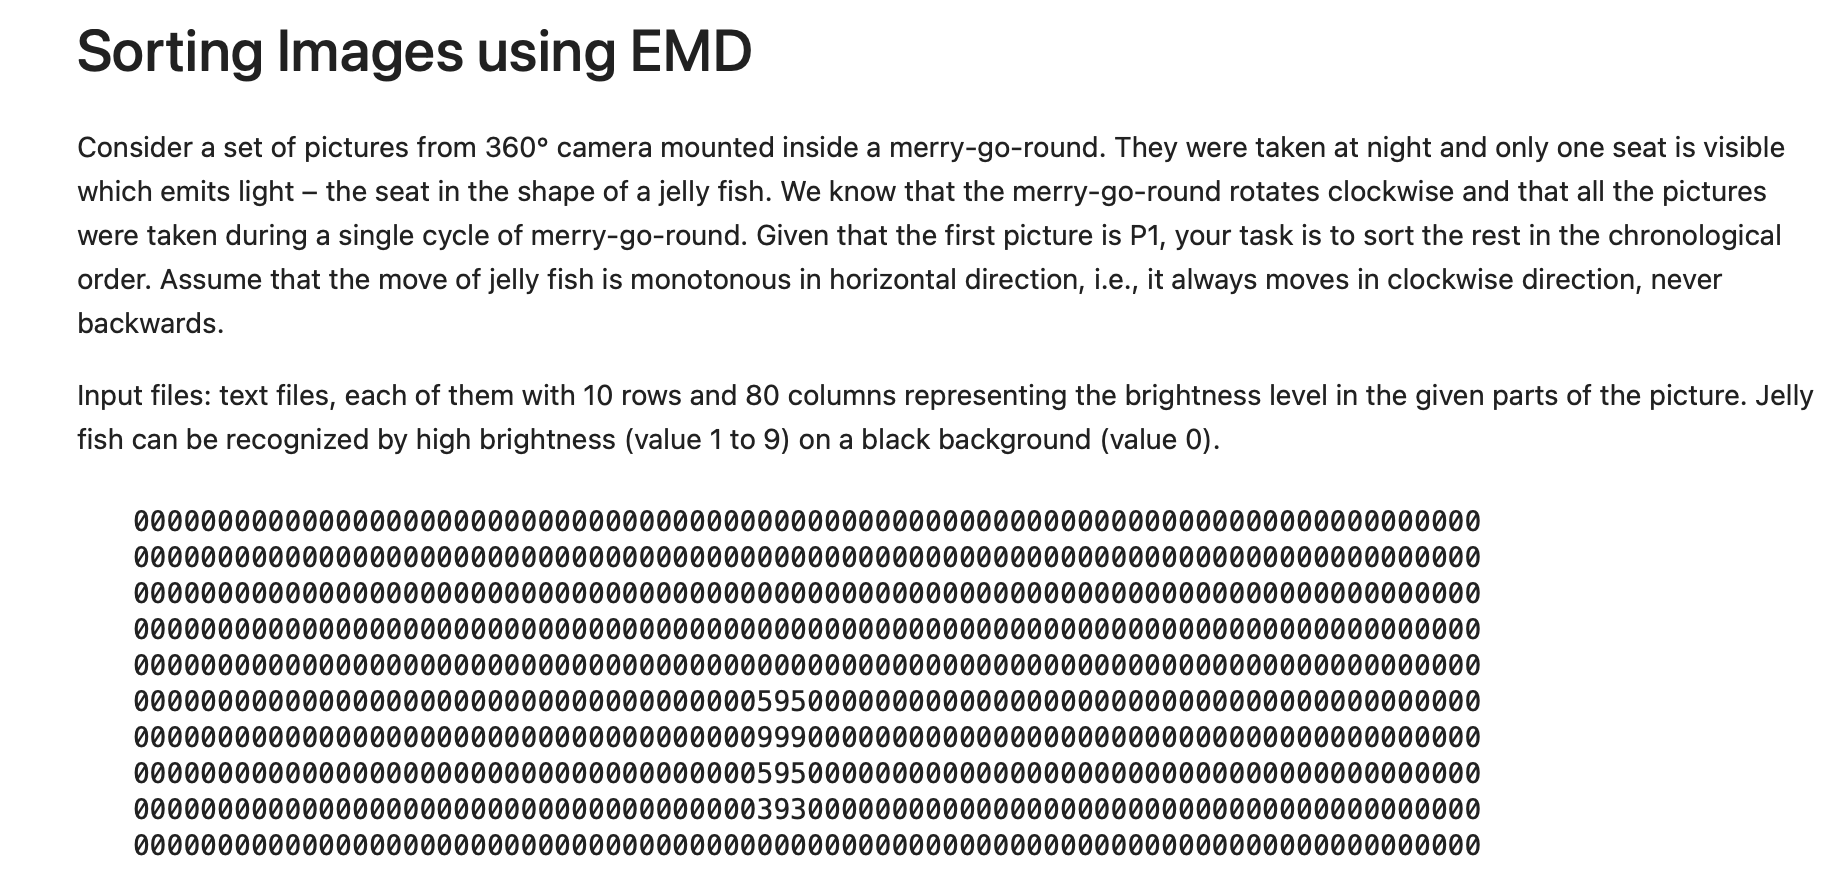

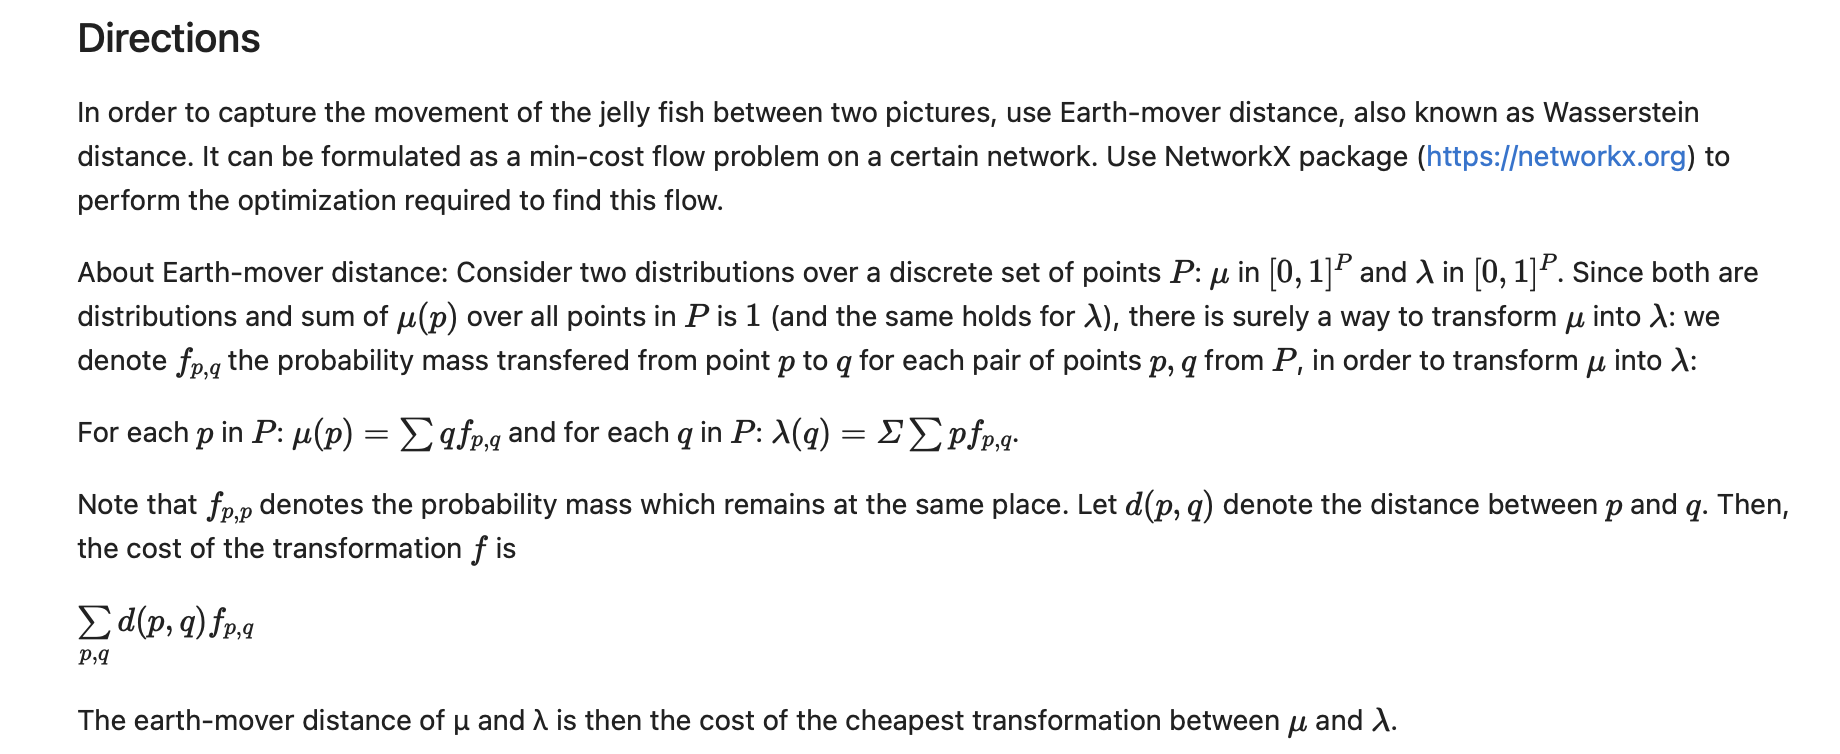

In [11]:
from IPython.display import Image, display

def display_images(image_files):
    for image_file in image_files:
        display(Image(filename=image_file))

image_files = ["./EMD-1.png", "./EMD-2.png"]  
display_images(image_files)

In [12]:

import numpy as np
import networkx as nx


def comp_dist(f1, f2):
    
    ma1 = np.zeros((10, 80))
    ma2 = np.zeros((10, 80))
    
    with open(f1) as f:
        for i,ln in enumerate(f):
            if ln.strip():
                ma1[i] = [int(num) for num in ln.strip()]

    with open(f2) as f:
        for i,ln in enumerate(f):
            if ln.strip():
                ma2[i] = [int(num) for num in ln.strip()]

    if np.sum(ma1) != 80:
         for i in range(10):
             for j in range(80):
                 ma1[i,j] = int(ma1[i,j] * 80)
                 
    else:
         for i in range(10):
             for j in range(80):
                 ma1[i,j] = int(ma1[i,j] * 39)
         
    if np.sum(ma2) != 80:
         for i in range(10):
             for j in range(80):
                 ma2[i,j] = int(ma2[i,j] * 80)
    else:
         for i in range(10):
             for j in range(80):
                 ma2[i,j] = int(ma2[i,j] *39)

    G = nx.DiGraph()
    
    for i in range(10):
        for j in range(80):
            if ma1[i,j] > 0:
                G.add_node((f's{i}_{j}', i, j), demand=-ma1[i,j])
    for i in range(10):
        for j in range(80):
            if ma2[i,j] > 0:
                G.add_node((f't{i}_{j}', i, j), demand=ma2[i,j])

    for i in range(10):
         for j in range(80):
             if ma1[i,j] > 0: 
                 for k in range(10):
                     for l in range(80):
                         if ma2[k,l] > 0:
                             if (l-j)>=0: 
                                G.add_edge((f's{i}_{j}', i, j), (f't{k}_{l}', k, l), weight= abs(j-l))
                             else:
                                 G.add_edge((f's{i}_{j}', i, j), (f't{k}_{l}', k, l), weight= 80 - abs(j-l))
                 
    dist = nx.min_cost_flow_cost(G)

    return dist

def sort_files():
    
    fls = []                        
    for i in range(1,16):
        fls.append(f'P{i}.txt')
    return sorted(fls, key = lambda x: comp_dist('P1.txt', x))
